In [1]:
import pandas as pd

In [2]:
rfm=pd.read_csv("rfm.csv")


In [3]:
#Recency : Low is better
#qcut - It splits a numeric series into equal-sized groups based on rank/percentiles, not fixed ranges.
rfm["R_score"]=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])

#Frequency : higher is better
rfm['F_score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])

#Monetary - higher is better
rfm['M_score']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

In [4]:
#RFM_segment and RFM_score

rfm["RFM_segment"]=(
    rfm['R_score'].astype(str)+
    rfm['F_score'].astype(str)+
    rfm['M_score'].astype(str)
)

rfm['RFM_score']=(
    rfm[['R_score','F_score','M_score']].astype(int).sum(axis=1)
)

In [5]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_segment,RFM_score
0,12346.0,326,1,77183.60,1,1,5,115,7
1,12347.0,2,7,4310.00,5,5,5,555,15
2,12348.0,75,4,1797.24,2,4,4,244,10
3,12349.0,19,1,1757.55,4,1,4,414,9
4,12350.0,310,1,334.40,1,1,2,112,4


In [6]:
#Mapping to business segments

def segment(x):
    if x>=12: return "Champions"
    if x>=19: return "Loyal Customers"
    if x>=6: return "Potential"
    else: return "At risk or lost"

rfm['Segment']=rfm['RFM_score'].apply(segment)

rfm[['CustomerID','Recency','Frequency','Monetary','RFM_score','Segment']]

,CustomerID,Recency,Frequency,Monetary,RFM_score,Segment
0,12346.0,326,1,77183.60,7,Potential
1,12347.0,2,7,4310.00,15,Champions
2,12348.0,75,4,1797.24,10,Potential
3,12349.0,19,1,1757.55,9,Potential
4,12350.0,310,1,334.40,4,At risk or lost
...,...,...,...,...,...,...
4334,18280.0,278,1,180.60,4,At risk or lost
4335,18281.0,181,1,80.82,4,At risk or lost
4336,18282.0,8,2,178.05,9,Potential
4337,18283.0,4,16,2094.88,15,Champions


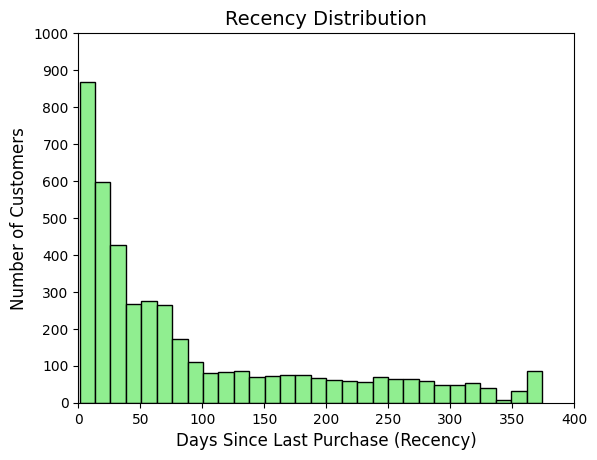

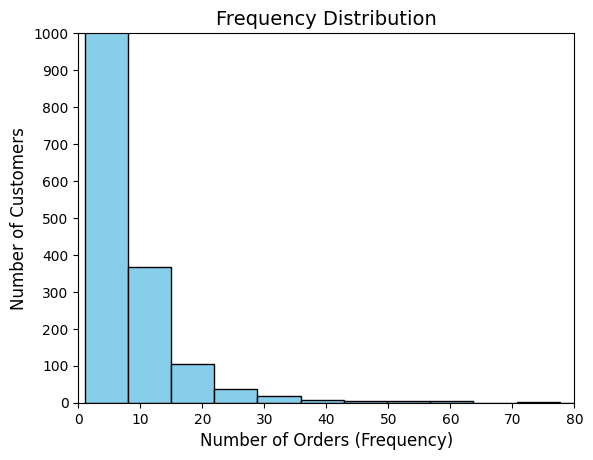

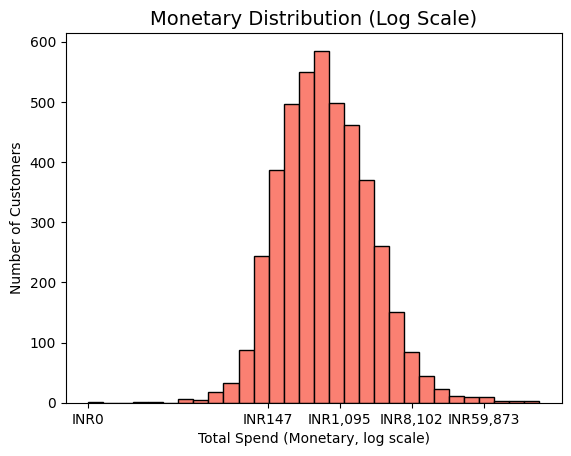

In [7]:
#Histogram of RFM
import matplotlib.pyplot as plt

# ---------------- Recency ----------------
plt.hist(rfm['Recency'], bins=30, color="lightgreen", edgecolor="black")
plt.title("Recency Distribution", fontsize=14)

# Most customers buy within a year, so limit view
plt.xlim(0, 400)      # focus on 0–400 days
plt.ylim(0, 1000)     # cap y-axis for readability

# Custom ticks
plt.xticks(range(0, 401, 50))   # every 50 days
plt.yticks(range(0, 1001, 100)) # every 100 customers

plt.xlabel("Days Since Last Purchase (Recency)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

# ---------------- Frequency ----------------
plt.hist(rfm['Frequency'], bins=30, color="skyblue", edgecolor="black")
plt.title("Frequency Distribution", fontsize=14)

plt.xlim(0, 80)       # focus on 0–80 orders
plt.ylim(0, 1000)     # cap at 1000 customers

plt.xticks(range(0, 81, 10))    # steps of 10 orders
plt.yticks(range(0, 1001, 100)) # steps of 100 customers

plt.xlabel("Number of Orders (Frequency)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

# Monetary
import numpy as np

log_m = np.log1p(rfm['Monetary'])

plt.hist(log_m, bins=30, color="salmon", edgecolor="black")
plt.title("Monetary Distribution (Log Scale)", fontsize=14)

# Replace log ticks with real-world spending values
ticks = [0, 5, 7, 9, 11]  # log values
labels = [np.expm1(t) for t in ticks]  # back-transform
plt.xticks(ticks, [f"INR{int(v):,}" for v in labels])

plt.xlabel("Total Spend (Monetary, log scale)")
plt.ylabel("Number of Customers")
plt.show()







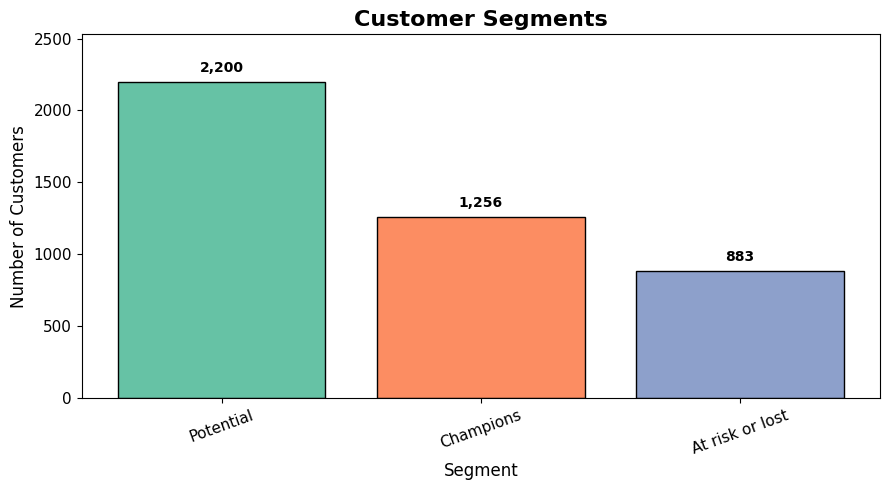

In [8]:
#Bar chart of Segment size
import matplotlib.pyplot as plt

segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(9,5))
bars = plt.bar(segment_counts.index, segment_counts.values,
               color=["#66c2a5", "#fc8d62", "#8da0cb"], edgecolor="black")

plt.title("Customer Segments", fontsize=16, fontweight="bold")
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=20, fontsize=11)
plt.yticks(fontsize=11)

plt.ylim(0, segment_counts.max() * 1.15)


# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50,
             f"{yval:,}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()
